<a href="https://colab.research.google.com/github/Chaitanya-Shinde/ML_Model/blob/main/Number_Recognition_using_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import fetch_openml
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from skimage.feature import hog

In [2]:
#STEP 2: loading MNIST dataset
print("Downloading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target.astype(np.uint8)

In [3]:
# STEP 3: Normalize and Split Dataset
X = X / 255.0  # normalize to [0, 1]

In [5]:
# HOG feature extraction
def extract_hog_features(images):
    hog_features = []
    for img in images:
        img_reshaped = img.reshape(28, 28).astype(np.uint8)
        features = hog(img_reshaped, orientations=9, pixels_per_cell=(8, 8),
                       cells_per_block=(2, 2), block_norm='L2-Hys')
        hog_features.append(features)
    return np.array(hog_features)

In [7]:
print("Extracting HOG features...")
X= X.astype(float)
X_hog = extract_hog_features(X.to_numpy())


Extracting HOG features...


In [9]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_hog, y, test_size=0.2, random_state=42)


In [10]:
# STEP 4: Train SVM Classifier with Linear Kernel
print("Training the SVM model with linear kernel...")
clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X_train, y_train)

Training the SVM model with linear kernel...


SVC(kernel='linear')

In [11]:
# STEP 5: Evaluate the Model
y_pred = clf.predict(X_test)
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Model Accuracy: 0.25935714285714284
Classification Report:
               precision    recall  f1-score   support

           0       0.29      0.28      0.28      1343
           1       0.28      0.50      0.36      1600
           2       0.31      0.16      0.21      1380
           3       0.26      0.34      0.30      1433
           4       0.24      0.25      0.25      1295
           5       0.56      0.04      0.08      1273
           6       0.17      0.27      0.21      1396
           7       0.35      0.24      0.28      1503
           8       0.21      0.28      0.24      1357
           9       0.33      0.18      0.24      1420

    accuracy                           0.26     14000
   macro avg       0.30      0.25      0.24     14000
weighted avg       0.30      0.26      0.25     14000



In [14]:
# STEP 6: Function to recognize a digit from an image
def predict_digit_from_image(image_path, model):
    # Loading the image and converting it into grayscale form
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if img is None:
        print(f"Failed to load image: {image_path}")
        return None

    # Resize to 28x28 pixels
    img_resized = cv2.resize(img, (28, 28))
    # Invert colors (white background, black digit)
    img_inverted = 255 - img_resized
    # Normalize pixel values
    img_normalized = img_inverted / 255.0
    # Extract HOG features from the image
    hog_features = hog(img_normalized, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm='L2-Hys')
    # Reshape HOG features for prediction
    hog_features = hog_features.reshape(1, -1)

    # Predict using the trained model
    prediction = model.predict(hog_features)[0]

    # Show the image and prediction
    plt.imshow(img_normalized, cmap='gray')
    plt.title(f"Predicted Digit: {prediction}")
    plt.axis('off')
    plt.show()

    return prediction

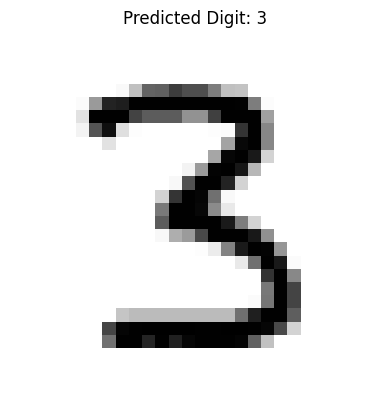

3

In [16]:
predict_digit_from_image("/content/handwritten_3.jpg", clf)